# Part 2: Scrape and Analyze Mars Weather Data

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
from splinter import Browser
import matplotlib.pyplot as plt

In [2]:
# URL to scrape
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

# Define the browser to utilize
browser = Browser('chrome')

# Visit the browser
browser.visit(url)

# Return all the HTML on our page
html = browser.html

# Create BeautifulSoup object; parse with 'html.parser'
soup = BeautifulSoup(html, "html.parser")

In [3]:
# Find the table
table = soup.find('table', class_='table')

In [4]:
# Store and clean the table
table_rows = table.find_all('tr')

mars = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        mars.append(row)
        
# Create the dataframe columns and print
df = pd.DataFrame(mars, columns=["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [5]:
# Before we proceed, check each column's type
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [6]:
# Convert each column type to date, int, or float
df.terrestrial_date = pd.to_datetime(df.terrestrial_date,dayfirst=True)
df.sol = df.sol.astype('int')
df.ls = df.ls.astype('int')
df.month = df.month.astype('int')
df.min_temp = df.min_temp.astype('float')
df.pressure = df.pressure.astype('float')

In [7]:
# How many months exist on Mars?
months = len(df['month'].unique())
months

12

In [8]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
sol_max = df['sol'].max()
sol_min = df['sol'].min()
sol_total = sol_max - sol_min
sol_total

1967

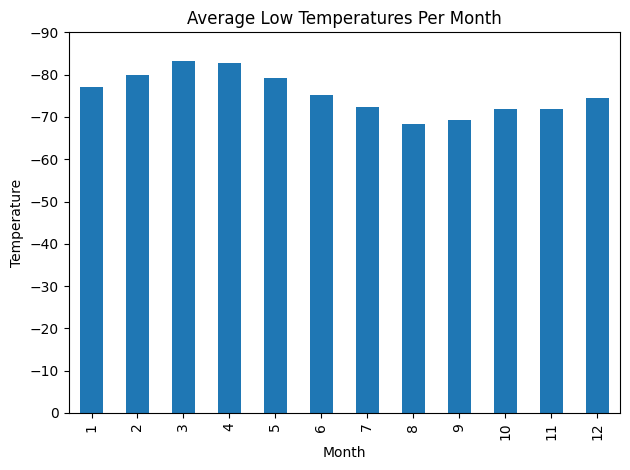

In [25]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
# Find the average minimum daily temperature for all of the months.
avg_lowest_temp = round(df.groupby('month').mean()['min_temp'],2)

# Plot the results as a bar chart.
fig, ax = plt.subplots()

avg_lowest_temp.plot(kind="bar")
ax.set_ylim(0, -90)
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.title("Average Low Temperatures Per Month")
plt.tight_layout()
plt.savefig("Images/average_low_temps.png")

In [34]:
# Calculate individually the coldest and warmest month on Mars and print the results
min_temp = avg_lowest_temp == avg_lowest_temp.min()
max_temp = avg_lowest_temp == avg_lowest_temp.max()

coldest_month = avg_lowest_temp[min_temp].index[0]
hottest_month = avg_lowest_temp[max_temp].index[0]

print(f"Month {coldest_month} is the coldest month on Mars")
print('--------------------')
print(f"Month {hottest_month} is the hottest month on Mars")

Month 3 is the coldest month on Mars
--------------------
Month 8 is the hottest month on Mars


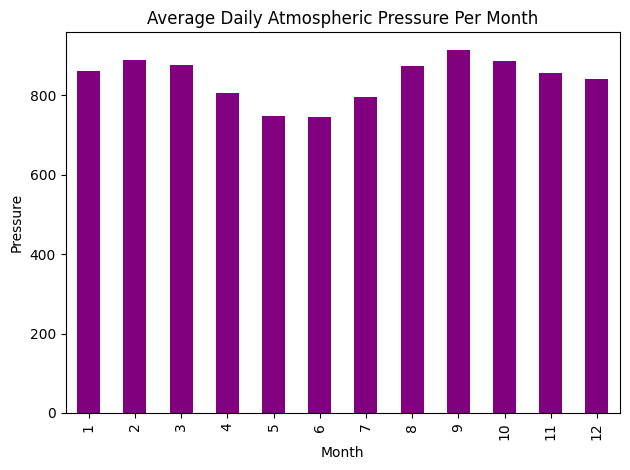

In [38]:
# Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
# Find the average daily atmospheric pressure of all the months.
avg_pressure = round(df.groupby('month').mean()['pressure'],2)

#Plot the results as a bar chart.
avg_pressure.plot(kind="bar", color = "purple")
plt.xlabel("Month")
plt.ylabel("Pressure")
plt.title("Average Daily Atmospheric Pressure Per Month")
plt.tight_layout()
plt.savefig("Images/average_pressure.png")

In [39]:
# Calculate the lowest and the highest atmospheric pressure on Mars and print the results
min_pressure = avg_pressure == avg_pressure.min()
max_pressure = avg_pressure == avg_pressure.max()

lowest_pressure_month = avg_pressure[min_pressure].index[0]
highest_pressure_month = avg_pressure[max_pressure].index[0]

print(f"Month {lowest_pressure_month} had the lowest levels of pressure on Mars")
print('--------------------')
print(f"Month {highest_pressure_month} had the lowest levels of pressure on Mars")

Month 6 had the lowest levels of pressure on Mars
--------------------
Month 9 had the lowest levels of pressure on Mars


In [43]:
# About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
# Consider how many days elapse on Earth in the time that Mars circles the Sun once.

# Find the first day for 'ls' to begin the calculation
first_ls = df['ls'].loc[0]

# Find the next row where the same first day repeats for 'ls'
next_ls = df.loc[df['ls'] == first_ls]

# Associate the previous dates for 'ls' with 'terrestrial_date'
last_day = next_ls['terrestrial_date'].loc[0]
first_day = next_ls['terrestrial_date'].iloc[1]

full_cycle = first_day-last_day

print (f"{full_cycle} terrestrial (Earth) days exist in a Martian year.")

686 days 00:00:00 terrestrial (Earth) days exist in a Martian year.


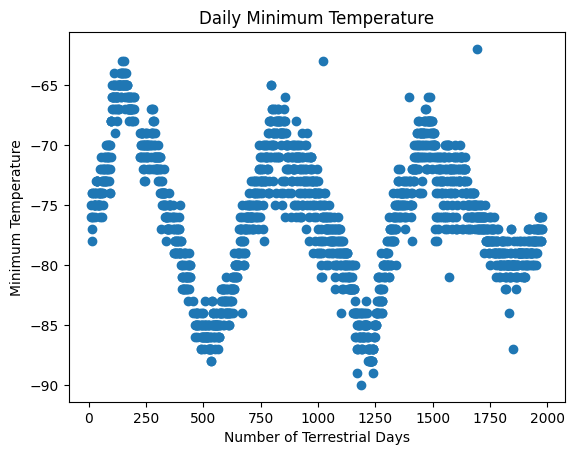

In [51]:
# Visually estimate the result by plotting the daily minimum temperature.
# Plot the minimum temperature vs Martian Days 
plt.scatter(df['sol'],df['min_temp'])
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.title('Daily Minimum Temperature')
plt.savefig("Images/daily_min_temp.png")

In [52]:
# Export the df into a CSV file
df.to_csv('mars_data.csv')

In [53]:
# Close the Browser
browser.quit()